### CITIBIKE ANALYSIS PROJECT


#### Libraries

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import plotly.express as px

#display the graphs
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)

### Reading Dataset


In [2]:
#read the csv file into a dataframe
cleaned_df = pd.read_csv('/Users/drushti/Documents/PythonProject/CitiBike/cleaned_df.csv')

In [3]:
#Creating GeoDataFrame for Start Station
gdf_start = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['start_lng'], cleaned_df['start_lat']), crs="EPSG:4326")

In [4]:
#Creating GeoDataFrame for End Station
gdf_end = gpd.GeoDataFrame(
    cleaned_df, geometry=gpd.points_from_xy(cleaned_df['end_lng'], cleaned_df['end_lat']), crs="EPSG:4326")

In [5]:
#Reading shape file for NJ boundary
nj_map = gpd.read_file('/Users/drushti/Documents/PythonProject/CitiBike/nj.geojson')

In [6]:
#EXTRACTING ZIPCODE AND GEOMETRY POINTS IN SEPERATE DATAFRAME
# ZCTA and zipcodede = https://help.healthycities.org/hc/en-us/articles/115006016767-What-is-the-difference-between-ZIP-Codes-and-ZCTAs-#:~:text=ZCTAs%20or%20ZIP%20Code%20Tabulation,same%20as%20its%20ZIP%20Code.
nj_map = nj_map[['ZCTA5CE10','geometry']]
nj_map.rename(columns={'ZCTA5CE10':'zipcode'},inplace=True)

#### EXTRACTING HUDSON COUNTY ZIPCODE FROM NJ BOUNDARY GEOJSON FILE

In [7]:
#### EXTRACTING ONLY ZIPCODE IN DATASET FROM NJ BOUNDARY FILE 
hudson_county = ['07302', '07030', '07307', '07306', '07310', '07304', '07311',
       '07305', '07032']
new_map = nj_map[nj_map['zipcode'].isin(hudson_county)]

#### SPATIAL JOIN - START STATION ZIPCODE

In [8]:
#Spatial Join on Geodataframe - https://geopandas.org/en/stable/gallery/spatial_joins.html

In [9]:
#PERFORMING SPATIAL JOINM TO MATCH START STATION ID WITH RESPECTIVE ZIPCODE
trip_start = gdf_start.sjoin(nj_map,how='left')

In [10]:
zip_null = trip_start[trip_start['zipcode'].isna()]
print(zip_null.shape)
zip_null['start_station_id'].value_counts()

(76, 22)


start_station_id
JC002      31
JC106       6
JC098       2
HB303       2
HB102       2
4824.03     1
7059.01     1
5922.04     1
5500.07     1
HB101       1
JC104       1
HB404       1
7123.04     1
6224.05     1
HB402       1
HB103       1
6889.12     1
HB607       1
5329.08     1
8262.07     1
8226.06     1
4617.01     1
5820.08     1
6659.09     1
5626.13     1
6560.15     1
8254.01     1
5065.14     1
4850.04     1
5616.01     1
6948.10     1
6747.07     1
6779.05     1
5065.04     1
5905.14     1
6756.05     1
5436.09     1
JC116       1
Name: count, dtype: int64

In [11]:
#### dropping rows with missing zipcode
ts_cleaned = trip_start.copy()
ts_cleaned.dropna(axis=0,inplace=True)
ts_cleaned.shape

(945267, 22)

#### SPATIAL JOIN - END STATION ZIPCODE

In [12]:
#PERFORMING SPATIAL JOIN TO MATCH END STATION ID WITH RESPECTIVE ZIPCODE
trip_end = gdf_end.sjoin(nj_map, how='left')
trip_end.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,startweekday,endweekday,starttime,endtime,month,tripduration,geometry,index_right,zipcode
0,D68047AAA9A72501,classic_bike,2022-08-12 18:14:45,2022-08-12 18:21:23,Columbus Drive,JC014,Hamilton Park,JC009,40.718355,-74.038914,...,member,Friday,Friday,18,18,August,6.63,POINT (-74.04425 40.72760),414.0,07302
1,E5B82A9F588A7650,classic_bike,2022-08-19 01:04:39,2022-08-19 01:14:10,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,8 St & Washington St,HB603,40.736982,-74.027781,...,member,Friday,Friday,1,1,August,9.52,POINT (-74.02820 40.74598),549.0,07030
2,AA0DBFF220DA98F6,classic_bike,2022-08-21 13:43:05,2022-08-21 13:53:13,Columbus Drive,JC014,Montgomery St,JC099,40.718355,-74.038914,...,member,Sunday,Sunday,13,13,August,10.13,POINT (-74.05099 40.71942),414.0,07302
3,8F11D340492FCD32,electric_bike,2022-08-04 22:02:12,2022-08-04 22:21:31,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Pershing Field,JC024,40.736982,-74.027781,...,member,Thursday,Thursday,22,22,August,19.32,POINT (-74.05179 40.74268),491.0,07307
4,48FF219B87E90004,electric_bike,2022-08-08 14:02:48,2022-08-08 14:16:11,Columbus Drive,JC014,Fairmount Ave,JC093,40.718355,-74.038914,...,member,Monday,Monday,14,14,August,13.38,POINT (-74.07196 40.72573),330.0,07306


In [13]:
end_zipnull = trip_end[trip_end['zipcode'].isnull()]
print(end_zipnull.shape)
end_zipnull['end_station_id'].value_counts()

(1401, 22)


end_station_id
5297.02    95
5470.10    61
5561.06    49
5065.10    45
5470.12    36
           ..
4060.09     1
5752.09     1
4243.01     1
6644.08     1
5128.04     1
Name: count, Length: 331, dtype: int64

In [14]:
#### dropping rows with missing zipcode
te_cleaned = trip_end.copy()
te_cleaned.dropna(axis=0,inplace=True)
te_cleaned.shape

(943942, 22)

In [15]:
#Renaming zipcode as start and end
te_cleaned.rename(columns={'zipcode':'zip_end'}, inplace = True)
ts_cleaned.rename(columns={'zipcode':'zip_start'}, inplace = True)

#### COMBINING START AND END GEODATAFRAME

In [16]:
#Combing start and end geodataframe and checking for missing zipcode
geo_df = ts_cleaned
geo_df['zip_end'] = te_cleaned['zip_end']
geo_df.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
start_station_id         0
end_station_name         0
end_station_id           0
start_lat                0
start_lng                0
end_lat                  0
end_lng                  0
member_casual            0
startweekday             0
endweekday               0
starttime                0
endtime                  0
month                    0
tripduration             0
geometry                 0
index_right              0
zip_start                0
zip_end               1372
dtype: int64

In [17]:
#dropping rows with missing zipcodes for end stations
geo_df.dropna(axis=0,inplace=True)
geo_df.shape

(943895, 23)

#### Seperating Hoboken and Jerser City 

In [18]:
Jersey_City = geo_df[geo_df['zip_start'].isin(['07302']) & geo_df['zip_end'].isin(['07302'])]
Hoboken = geo_df[geo_df['zip_start'].isin(['07030']) & geo_df['zip_end'].isin(['07030'])]

#### Stations with largest surplus and Deficit in Hoboken

In [19]:
starts_hrly = Hoboken.groupby(['starttime','start_station_name'], as_index = False)[['ride_id']].count()
starts_hrly.columns = ['hour','start_station','start_count']
starts_hrly

,hour,start_station,start_count
0,0,11 St & Washington St,202
1,0,12 St & Sinatra Dr N,189
2,0,14 St Ferry - 14 St & Shipyard Ln,163
3,0,2 St & Park Ave,69
4,0,4 St & Grand St,112
...,...,...,...
699,23,Marshall St & 2 St,71
700,23,South Waterfront Walkway - Sinatra Dr & 1 St,734
701,23,Southwest Park - Jackson St & Observer Hwy,49
702,23,Stevens - River Ter & 6 St,198


In [20]:
ends_hrly = Hoboken.groupby(['endtime','end_station_name'], as_index = False)[['ride_id']].count()
ends_hrly.columns = ['hour','end_station','end_count']
ends_hrly

,hour,end_station,end_count
0,0,11 St & Washington St,305
1,0,12 St & Sinatra Dr N,330
2,0,14 St Ferry - 14 St & Shipyard Ln,302
3,0,2 St & Park Ave,56
4,0,4 St & Grand St,176
...,...,...,...
691,23,Marshall St & 2 St,206
692,23,South Waterfront Walkway - Sinatra Dr & 1 St,460
693,23,Southwest Park - Jackson St & Observer Hwy,231
694,23,Stevens - River Ter & 6 St,99


In [21]:
supply_hrly = starts_hrly.merge(ends_hrly,
                               left_on = ['hour','start_station'],
                               right_on = ['hour','end_station'],
                               how = 'outer')
supply_hrly.head(5)

,hour,start_station,start_count,end_station,end_count
0,0,11 St & Washington St,202.0,11 St & Washington St,305.0
1,0,12 St & Sinatra Dr N,189.0,12 St & Sinatra Dr N,330.0
2,0,14 St Ferry - 14 St & Shipyard Ln,163.0,14 St Ferry - 14 St & Shipyard Ln,302.0
3,0,2 St & Park Ave,69.0,2 St & Park Ave,56.0
4,0,4 St & Grand St,112.0,4 St & Grand St,176.0


In [22]:
supply_hrly['start_count'].fillna(0, inplace=True)
supply_hrly['end_count'].fillna(0, inplace=True)

In [23]:
supply_hrly['hrly_surplus'] = (supply_hrly['end_count'] - supply_hrly['start_count'])/365
supply_hrly.sort_values(by = 'hrly_surplus').head(6)

,hour,start_station,start_count,end_station,end_count,hrly_surplus
518,17,Hoboken Terminal - River St & Hudson Pl,5916.0,Hoboken Terminal - River St & Hudson Pl,2725.0,-8.742466
548,18,Hoboken Terminal - River St & Hudson Pl,5267.0,Hoboken Terminal - River St & Hudson Pl,2513.0,-7.545205
489,16,Hoboken Terminal - River St & Hudson Pl,3730.0,Hoboken Terminal - River St & Hudson Pl,2012.0,-4.706849
460,15,Hoboken Terminal - River St & Hudson Pl,2906.0,Hoboken Terminal - River St & Hudson Pl,1517.0,-3.805479
554,18,South Waterfront Walkway - Sinatra Dr & 1 St,3433.0,South Waterfront Walkway - Sinatra Dr & 1 St,2190.0,-3.405479
525,17,South Waterfront Walkway - Sinatra Dr & 1 St,3364.0,South Waterfront Walkway - Sinatra Dr & 1 St,2220.0,-3.134247


In [24]:
supply_hrly.sort_values(by = 'hrly_surplus', ascending = False).head(20)


,hour,start_station,start_count,end_station,end_count,hrly_surplus
223,7,Hoboken Terminal - River St & Hudson Pl,531.0,Hoboken Terminal - River St & Hudson Pl,4305.0,10.339726
253,8,Hoboken Terminal - River St & Hudson Pl,1195.0,Hoboken Terminal - River St & Hudson Pl,3763.0,7.035616
193,6,Hoboken Terminal - River St & Hudson Pl,228.0,Hoboken Terminal - River St & Hudson Pl,2439.0,6.057534
246,8,City Hall - Washington St & 1 St,610.0,City Hall - Washington St & 1 St,2357.0,4.786301
222,7,Hoboken Terminal - Hudson St & Hudson Pl,553.0,Hoboken Terminal - Hudson St & Hudson Pl,2198.0,4.506849
261,8,South Waterfront Walkway - Sinatra Dr & 1 St,1028.0,South Waterfront Walkway - Sinatra Dr & 1 St,2566.0,4.213699
229,7,South Waterfront Walkway - Sinatra Dr & 1 St,517.0,South Waterfront Walkway - Sinatra Dr & 1 St,1910.0,3.816438
192,6,Hoboken Terminal - Hudson St & Hudson Pl,178.0,Hoboken Terminal - Hudson St & Hudson Pl,1378.0,3.287671
217,7,City Hall - Washington St & 1 St,317.0,City Hall - Washington St & 1 St,1139.0,2.252055
252,8,Hoboken Terminal - Hudson St & Hudson Pl,1049.0,Hoboken Terminal - Hudson St & Hudson Pl,1806.0,2.073973


In [25]:
supply_hrly.sort_values(by = 'hrly_surplus', ascending = True).head(20)


,hour,start_station,start_count,end_station,end_count,hrly_surplus
518,17,Hoboken Terminal - River St & Hudson Pl,5916.0,Hoboken Terminal - River St & Hudson Pl,2725.0,-8.742466
548,18,Hoboken Terminal - River St & Hudson Pl,5267.0,Hoboken Terminal - River St & Hudson Pl,2513.0,-7.545205
489,16,Hoboken Terminal - River St & Hudson Pl,3730.0,Hoboken Terminal - River St & Hudson Pl,2012.0,-4.706849
460,15,Hoboken Terminal - River St & Hudson Pl,2906.0,Hoboken Terminal - River St & Hudson Pl,1517.0,-3.805479
554,18,South Waterfront Walkway - Sinatra Dr & 1 St,3433.0,South Waterfront Walkway - Sinatra Dr & 1 St,2190.0,-3.405479
525,17,South Waterfront Walkway - Sinatra Dr & 1 St,3364.0,South Waterfront Walkway - Sinatra Dr & 1 St,2220.0,-3.134247
577,19,Hoboken Terminal - River St & Hudson Pl,2744.0,Hoboken Terminal - River St & Hudson Pl,1617.0,-3.087671
542,18,City Hall - Washington St & 1 St,2612.0,City Hall - Washington St & 1 St,1679.0,-2.556164
225,7,Madison St & 1 St,1069.0,Madison St & 1 St,205.0,-2.367123
665,22,Hoboken Terminal - River St & Hudson Pl,1277.0,Hoboken Terminal - River St & Hudson Pl,478.0,-2.189041


In [26]:
# separate hourly changes in supply for 5 stations with the greatest surplus/deficit peaks
station1 = supply_hrly[supply_hrly['start_station'] == 'Hoboken Terminal - River St & Hudson Pl']
station2 = supply_hrly[supply_hrly['start_station'] == 'South Waterfront Walkway - Sinatra Dr & 1 St']
station3 = supply_hrly[supply_hrly['start_station'] == 'City Hall - Washington St & 1 St']
#station4 = supply_hrly[supply_hrly['start_station'] == 'City Hall - Washington St & 1 St']
#station5 = supply_hrly[supply_hrly['start_station'] == 'South Waterfront Walkway - Sinatra Dr & 1 St']


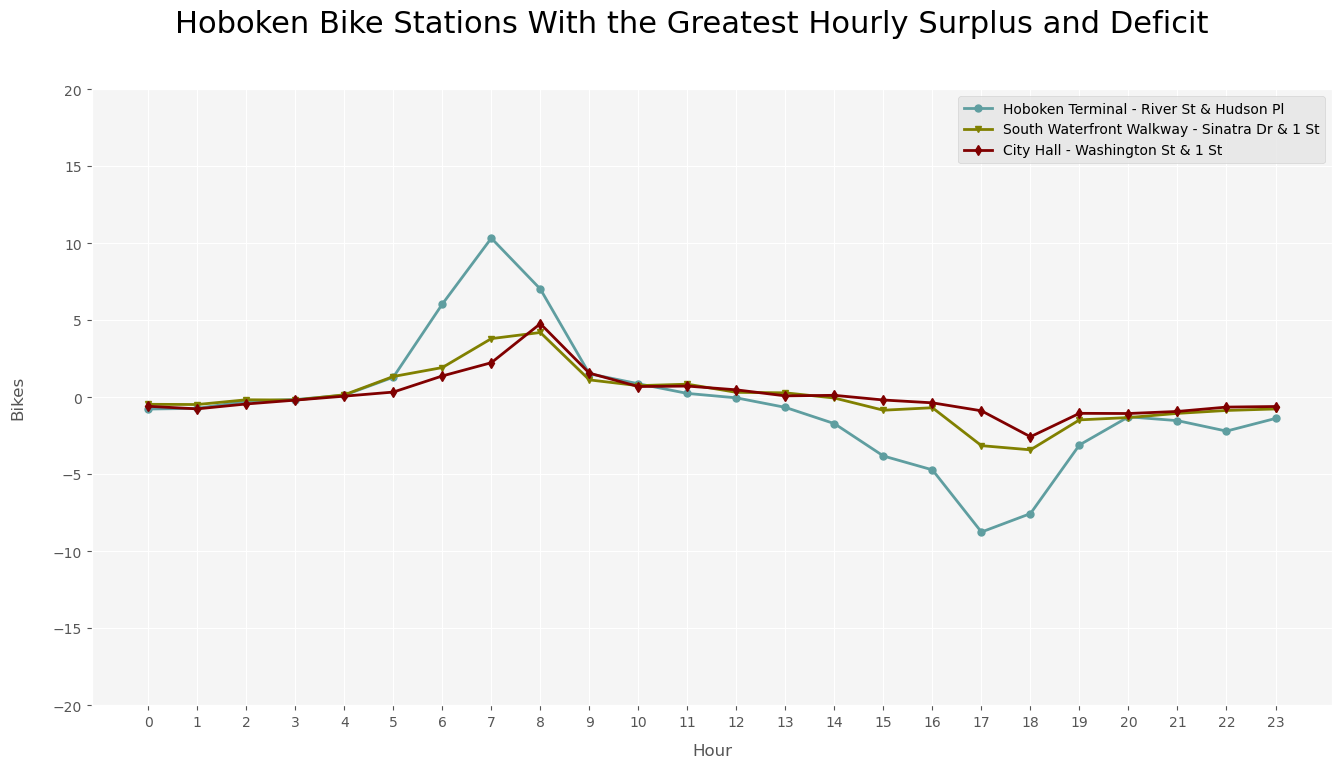

In [27]:
fig,ax1= plt.subplots(figsize=(16, 8))

fig.suptitle('Hoboken Bike Stations With the Greatest Hourly Surplus and Deficit', fontsize=22)

# line graph depicting hourly surplus and deficit for 5 stations

x = np.arange(24)
station1.plot(ax=ax1, x = 'hour', y = 'hrly_surplus', marker='o', markerfacecolor='cadetblue', markersize=5, color='cadetblue', linewidth=2)
station2.plot(ax=ax1, x = 'hour', y = 'hrly_surplus', marker='v', markerfacecolor='olive', markersize=5, color='olive', linewidth=2)
station3.plot(ax=ax1, x = 'hour', y = 'hrly_surplus',marker='d', markerfacecolor='maroon', markersize=5, color='maroon', linewidth=2)
#station4.plot(ax=ax1, x = 'hour', y = 'hrly_surplus', marker='x', markerfacecolor='violet', markersize=5, color='purple', linewidth=2)
#station5.plot(ax=ax1, x = 'hour', y = 'hrly_surplus', marker='s', markerfacecolor='crimson', markersize=5, color='crimson', linewidth=2)

ax1.set_xticks(x)
ax1.set_xlabel('Hour', labelpad = 10)
ax1.set_ylabel('Bikes', labelpad = 20)
ax1.set_ylim(-20, 20)
ax1.set_facecolor("whitesmoke")
ax1.legend(['Hoboken Terminal - River St & Hudson Pl','South Waterfront Walkway - Sinatra Dr & 1 St','City Hall - Washington St & 1 St'])


#### Stations with largest surplus and Deficit in JerseyCity

In [28]:
starts_hrly = Jersey_City.groupby(['starttime','start_station_name'], as_index = False)[['ride_id']].count()
starts_hrly.columns = ['hour','start_station','start_count']
starts_hrly

,hour,start_station,start_count
0,0,Baldwin at Montgomery,39
1,0,Brunswick & 6th,14
2,0,Brunswick St,37
3,0,City Hall,141
4,0,Columbus Dr at Exchange Pl,3
...,...,...,...
660,23,Newark Ave,227
661,23,Paulus Hook,62
662,23,Van Vorst Park,92
663,23,Warren St,145


In [29]:
ends_hrly = Jersey_City.groupby(['endtime','end_station_name'], as_index = False)[['ride_id']].count()
ends_hrly.columns = ['hour','end_station','end_count']
ends_hrly

,hour,end_station,end_count
0,0,Baldwin at Montgomery,235
1,0,Brunswick & 6th,79
2,0,Brunswick St,168
3,0,City Hall,52
4,0,Columbus Drive,56
...,...,...,...
595,23,Newark Ave,152
596,23,Paulus Hook,45
597,23,Van Vorst Park,185
598,23,Warren St,119


In [30]:
supply_hrly = starts_hrly.merge(ends_hrly,
                               left_on = ['hour','start_station'],
                               right_on = ['hour','end_station'],
                               how = 'outer')
supply_hrly.head(5)

,hour,start_station,start_count,end_station,end_count
0,0,Baldwin at Montgomery,39.0,Baldwin at Montgomery,235.0
1,0,Brunswick & 6th,14.0,Brunswick & 6th,79.0
2,0,Brunswick St,37.0,Brunswick St,168.0
3,0,City Hall,141.0,City Hall,52.0
4,0,Columbus Dr at Exchange Pl,3.0,NaN,NaN


In [31]:
supply_hrly['start_count'].fillna(0, inplace=True)
supply_hrly['end_count'].fillna(0, inplace=True)

In [32]:
supply_hrly['hrly_surplus'] = (supply_hrly['end_count'] - supply_hrly['start_count'])/365
supply_hrly.sort_values(by = 'hrly_surplus').head(6)

,hour,start_station,start_count,end_station,end_count,hrly_surplus
499,18,Grove St PATH,5352.0,Grove St PATH,2057.0,-9.027397
471,17,Grove St PATH,4525.0,Grove St PATH,2157.0,-6.487671
529,19,Grove St PATH,3425.0,Grove St PATH,1472.0,-5.350685
563,20,Grove St PATH,2404.0,Grove St PATH,1117.0,-3.526027
221,8,Hamilton Park,1732.0,Hamilton Park,484.0,-3.419178
593,21,Grove St PATH,1855.0,Grove St PATH,625.0,-3.369863


In [33]:
supply_hrly.sort_values(by = 'hrly_surplus', ascending = False).head(20)


,hour,start_station,start_count,end_station,end_count,hrly_surplus
220,8,Grove St PATH,960.0,Grove St PATH,6336.0,14.728767
194,7,Grove St PATH,659.0,Grove St PATH,5319.0,12.767123
248,9,Grove St PATH,823.0,Grove St PATH,2893.0,5.671233
167,6,Grove St PATH,532.0,Grove St PATH,2277.0,4.780822
206,7,Paulus Hook,86.0,Paulus Hook,1112.0,2.810959
472,17,Hamilton Park,1089.0,Hamilton Park,1870.0,2.139726
180,6,Paulus Hook,20.0,Paulus Hook,757.0,2.019178
276,10,Grove St PATH,759.0,Grove St PATH,1410.0,1.783562
304,11,Grove St PATH,657.0,Grove St PATH,1296.0,1.750685
508,18,Monmouth and 6th,335.0,Monmouth and 6th,964.0,1.723288


In [34]:
supply_hrly.sort_values(by = 'hrly_surplus', ascending = True).head(20)


,hour,start_station,start_count,end_station,end_count,hrly_surplus
499,18,Grove St PATH,5352.0,Grove St PATH,2057.0,-9.027397
471,17,Grove St PATH,4525.0,Grove St PATH,2157.0,-6.487671
529,19,Grove St PATH,3425.0,Grove St PATH,1472.0,-5.350685
563,20,Grove St PATH,2404.0,Grove St PATH,1117.0,-3.526027
221,8,Hamilton Park,1732.0,Hamilton Park,484.0,-3.419178
593,21,Grove St PATH,1855.0,Grove St PATH,625.0,-3.369863
201,7,Marin Light Rail,1345.0,Marin Light Rail,160.0,-3.246575
443,16,Grove St PATH,2576.0,Grove St PATH,1536.0,-2.849315
212,8,Brunswick St,1200.0,Brunswick St,167.0,-2.830137
195,7,Hamilton Park,1269.0,Hamilton Park,276.0,-2.720548


In [35]:
# separate hourly changes in supply for 5 stations with the greatest surplus/deficit peaks
station1 = supply_hrly[supply_hrly['start_station'] == 'Grove St PATH']
station2 = supply_hrly[supply_hrly['start_station'] == 'Hamilton Park']
station3 = supply_hrly[supply_hrly['start_station'] == 'Paulus Hook']
#station4 = supply_hrly[supply_hrly['start_station'] == 'Paulus Hook']
#station5 = supply_hrly[supply_hrly['start_station'] == 'South Waterfront Walkway - Sinatra Dr & 1 St']


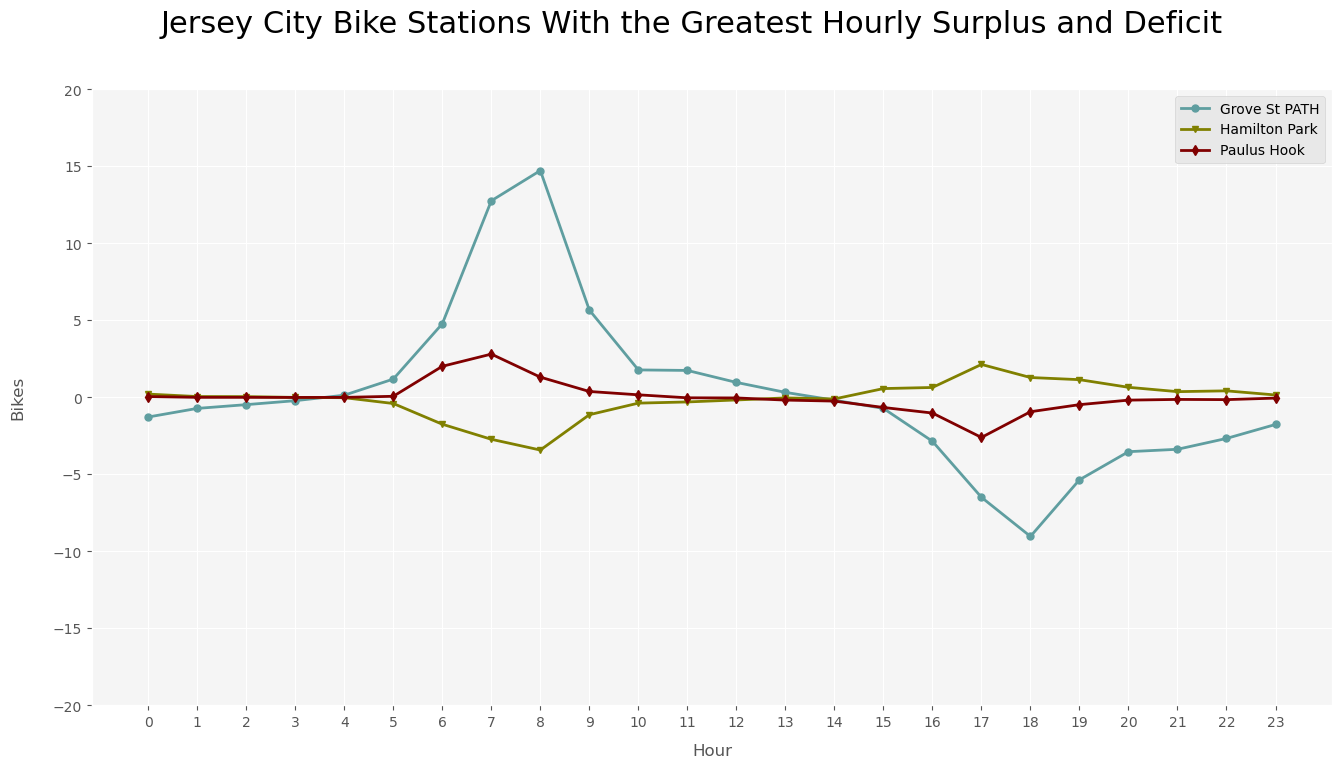

In [36]:
fig,ax1= plt.subplots(figsize=(16, 8))

fig.suptitle('Jersey City Bike Stations With the Greatest Hourly Surplus and Deficit', fontsize=22)

# line graph depicting hourly surplus and deficit for 5 stations

x = np.arange(24)
station1.plot(ax=ax1, x = 'hour', y = 'hrly_surplus', marker='o', markerfacecolor='cadetblue', markersize=5, color='cadetblue', linewidth=2)
station2.plot(ax=ax1, x = 'hour', y = 'hrly_surplus', marker='v', markerfacecolor='olive', markersize=5, color='olive', linewidth=2)
station3.plot(ax=ax1, x = 'hour', y = 'hrly_surplus',marker='d', markerfacecolor='maroon', markersize=5, color='maroon', linewidth=2)
#station4.plot(ax=ax1, x = 'hour', y = 'hrly_surplus', marker='x', markerfacecolor='violet', markersize=5, color='purple', linewidth=2)
#station5.plot(ax=ax1, x = 'hour', y = 'hrly_surplus', marker='s', markerfacecolor='crimson', markersize=5, color='crimson', linewidth=2)

ax1.set_xticks(x)
ax1.set_xlabel('Hour', labelpad = 10)
ax1.set_ylabel('Bikes', labelpad = 20)
ax1.set_ylim(-20, 20)
ax1.set_facecolor("whitesmoke")
ax1.legend(['Grove St PATH','Hamilton Park','Paulus Hook'])
